In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def produce_spike():
    """
    Simulate a single spike. A spike lasts 1 ms and is represented as 1.
    """
    return 1

def generate_spike_train(duration_ms, spike_prob=0.1):
    """
    Generate a spike train for a given duration in milliseconds, with a given spike probability.

    Parameters:
    - duration_ms: int, total duration in milliseconds.
    - spike_prob: float, probability of a spike occurring in each millisecond.

    Returns:
    - spike_train: numpy array, a sequence of 0s and 1s representing spikes.
    """
    spike_train = np.array([produce_spike() if np.random.rand() < spike_prob else 0 for _ in range(duration_ms)])
    return spike_train

def generate_regular_spiking_activity(duration_ms, interval_ms=100):
    """
    Generate the spiking activity of a neuron that fires one spike every `interval_ms`.

    Parameters:
    - duration_ms: int, total duration in milliseconds.
    - interval_ms: int, interval in milliseconds between consecutive spikes.

    Returns:
    - spike_train: numpy array, a sequence of 0s and 1s with spikes at regular intervals.
    """
    spike_train = np.zeros(duration_ms, dtype=int)
    for t in range(0, duration_ms, interval_ms):
        spike_train[t] = produce_spike()
    return spike_train

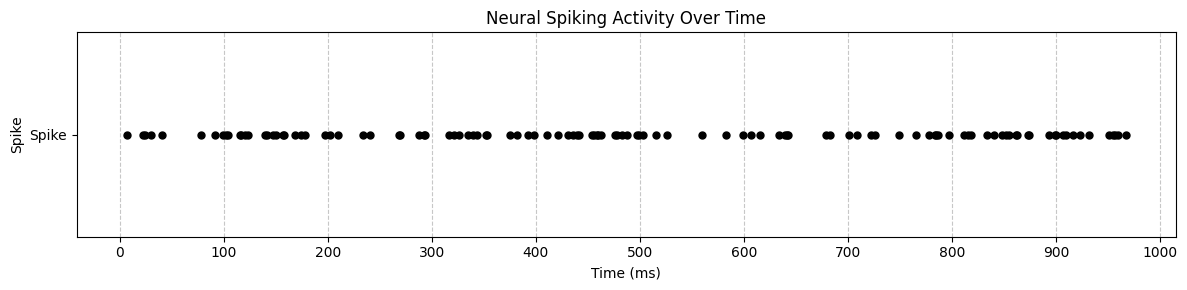

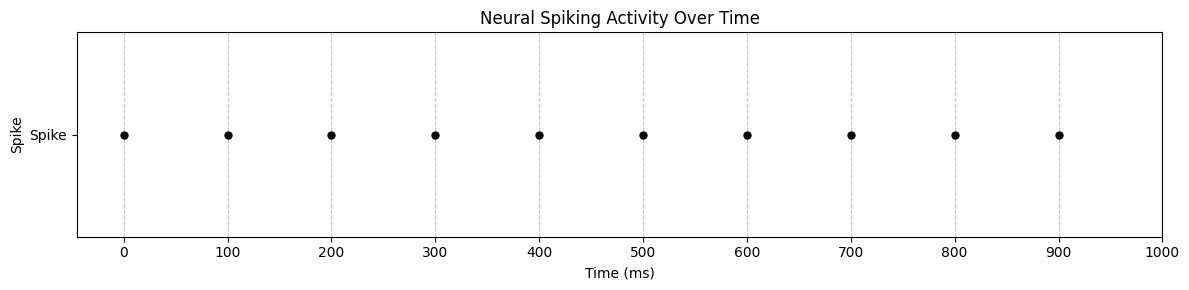

In [14]:
def plot_spike_train(spike_train):
    """
    Plot the neural spiking activity as a function of time.

    Parameters:
    - spike_train: numpy array, a sequence of 0s and 1s representing spikes.
    """
    time_ms = np.arange(len(spike_train))
    spike_times = time_ms[spike_train == 1]

    plt.figure(figsize=(12, 3))
    plt.plot(spike_times, [1] * len(spike_times), 'o', color='black', markersize=5)
    plt.title('Neural Spiking Activity Over Time')
    plt.xlabel('Time (ms)')
    plt.ylabel('Spike')
    plt.yticks([1], ['Spike'])
    plt.xticks(range(0, len(spike_train) + 1, 100))
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Example 1: Random spiking activity
spike_train_random = generate_spike_train(duration_ms=1000, spike_prob=0.1)
plot_spike_train(spike_train_random)

# Example 2: Regular spiking activity (one spike every 100 ms)
spike_train_regular = generate_regular_spiking_activity(duration_ms=1000, interval_ms=100)
plot_spike_train(spike_train_regular)

Excercise 2

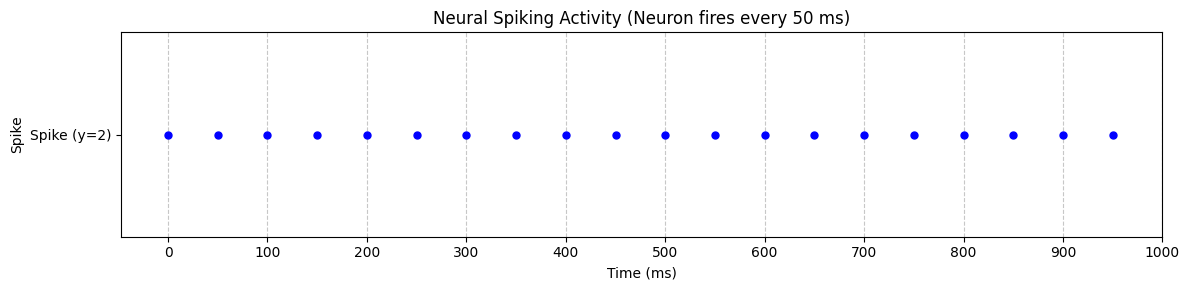

In [15]:
# Generate spiking activity for a neuron that fires every 50 ms
spike_train_50ms = generate_regular_spiking_activity(duration_ms=1000, interval_ms=50)

# Plotting function for a specific spike train with custom y-value and color
def plot_spike_train_custom(spike_train, y_value, color, title):
    """
    Plot the neural spiking activity with a specific y-value and color for tick marks.

    Parameters:
    - spike_train: numpy array, a sequence of 0s and 1s representing spikes.
    - y_value: float, y-coordinate for tick marks.
    - color: str, color of the tick marks.
    - title: str, title for the plot.
    """
    time_ms = np.arange(len(spike_train))
    spike_times = time_ms[spike_train == 1]

    plt.figure(figsize=(12, 3))
    plt.plot(spike_times, [y_value] * len(spike_times), 'o', color=color, markersize=5)
    plt.title(title)
    plt.xlabel('Time (ms)')
    plt.ylabel('Spike')
    plt.yticks([y_value], [f'Spike (y={y_value})'])
    plt.xticks(range(0, len(spike_train) + 1, 100))
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Plotting the spike train for a neuron firing every 50 ms
plot_spike_train_custom(
    spike_train_50ms,
    y_value=2,
    color='blue',
    title='Neural Spiking Activity (Neuron fires every 50 ms)'
)

Excercise 3

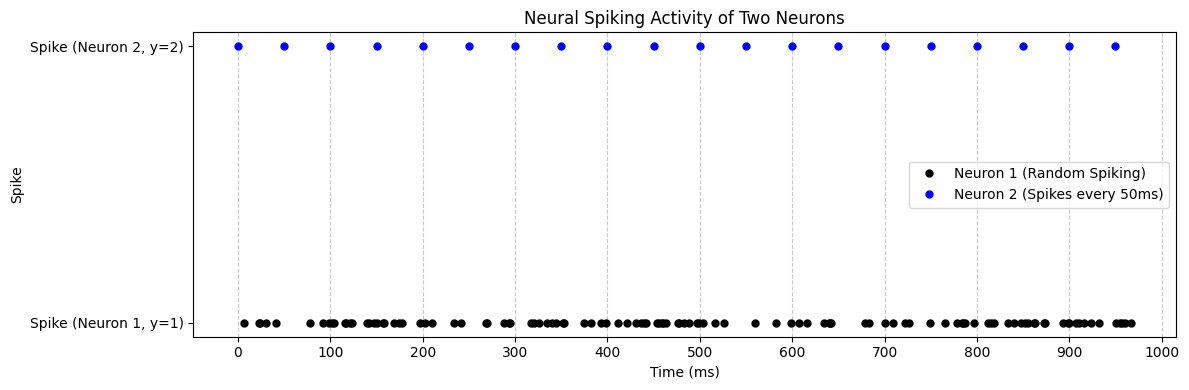

In [16]:
# Plotting the spiking activity of both neurons in the same plot
def plot_combined_spike_trains(spike_train_1, y_value_1, color_1, label_1,
                               spike_train_2, y_value_2, color_2, label_2):
    """
    Plot the spiking activity of two neurons on the same plot.

    Parameters:
    - spike_train_1: numpy array, first neuron's spike train.
    - y_value_1: float, y-coordinate for the first neuron's tick marks.
    - color_1: str, color of the first neuron's tick marks.
    - label_1: str, label for the first neuron.
    - spike_train_2: numpy array, second neuron's spike train.
    - y_value_2: float, y-coordinate for the second neuron's tick marks.
    - color_2: str, color of the second neuron's tick marks.
    - label_2: str, label for the second neuron.
    """
    time_ms = np.arange(len(spike_train_1))
    spike_times_1 = time_ms[spike_train_1 == 1]
    spike_times_2 = time_ms[spike_train_2 == 1]

    plt.figure(figsize=(12, 4))
    plt.plot(spike_times_1, [y_value_1] * len(spike_times_1), 'o', color=color_1, markersize=5, label=label_1)
    plt.plot(spike_times_2, [y_value_2] * len(spike_times_2), 'o', color=color_2, markersize=5, label=label_2)

    plt.title('Neural Spiking Activity of Two Neurons')
    plt.xlabel('Time (ms)')
    plt.ylabel('Spike')
    plt.yticks([y_value_1, y_value_2], [f'Spike (Neuron 1, y={y_value_1})', f'Spike (Neuron 2, y={y_value_2})'])
    plt.xticks(range(0, len(spike_train_1) + 1, 100))
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot the activity of both neurons
plot_combined_spike_trains(
    spike_train_1=spike_train_random,  # Neuron 1: Random spiking
    y_value_1=1,
    color_1='black',
    label_1='Neuron 1 (Random Spiking)',
    spike_train_2=spike_train_50ms,    # Neuron 2: Spiking every 50ms
    y_value_2=2,
    color_2='blue',
    label_2='Neuron 2 (Spikes every 50ms)'
)

Exsercise 4


The function: $$f(x) = \frac{1}{1 + e^{-\beta(x - \text{threshold})}}$$


In [17]:

def sigmoid(x, threshold=0, beta=10):
    """
    Compute the sigmoid function for a given input x.

    Parameters:
    - x: float or numpy array, input value(s).
    - threshold: float, the threshold for spiking.
    - beta: float, steepness of the sigmoid curve.

    Returns:
    - float or numpy array, the output of the sigmoid function.
    """
    return 1 / (1 + np.exp(-beta * (x - threshold)))

# Test the sigmoid function
threshold = 1.0  # Set a threshold value
beta = 10        # Steepness of the sigmoid curve

# Values below threshold
x_below_threshold = np.array([-2, -1, 0, 0.5])
output_below = sigmoid(x_below_threshold, threshold=threshold, beta=beta)
print("Outputs for values below threshold:", output_below)

# Values above threshold
x_above_threshold = np.array([1.5, 2, 3, 4])
output_above = sigmoid(x_above_threshold, threshold=threshold, beta=beta)
print("Outputs for values above threshold:", output_above)

Outputs for values below threshold: [9.35762297e-14 2.06115362e-09 4.53978687e-05 6.69285092e-03]
Outputs for values above threshold: [0.99330715 0.9999546  1.         1.        ]
